## ADNI

In [1]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_abeta.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
df=result_adni
# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)



D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
abeta_value=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df_meta_tau=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df_meta_tau.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df_meta_tau['Prediction'] =df_meta_tau[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)


In [4]:
df["Meta tau Prediction"]=df_meta_tau['Prediction']
df["Meta tau Truth"]=df_meta_tau['Truth']

In [5]:
df["CENTILOIDS"]=abeta_value["CENTILOIDS"]

In [6]:
df["zscore_meta_tau"]=abeta_value["zscore_meta_tau"]

In [7]:
df=df.fillna("NA")

In [8]:
df_filtered=df[(df["Truth"]!="Unknown.")&(df["zscore_meta_tau"]!="NA")]

In [9]:
df_filtered

,Index,Clearly positive,Weakly positive,Intermediate negative,Negative,Truth,Prediction,Meta tau Prediction,Meta tau Truth,CENTILOIDS,zscore_meta_tau
98,98,0.539947,0.088144,0.157133,0.214776,Negative,Clearly positive,Super high,Super high,-16.0,2.160181
281,281,0.567456,0.111739,0.205519,0.115286,Clearly positive,Clearly positive,Super high,Super high,85.0,2.978898
283,283,0.507417,0.126306,0.211523,0.154754,Clearly positive,Clearly positive,Super high,Super high,85.0,3.095857
330,330,0.196584,0.087234,0.181811,0.534371,Negative,Negative,Very low,Very low,-17.0,-2.284281
342,342,0.116009,0.071471,0.185382,0.627138,Negative,Negative,High,Very low,-3.0,-0.763807
...,...,...,...,...,...,...,...,...,...,...,...
2457,2457,0.430093,0.091572,0.110457,0.367878,Clearly positive,Clearly positive,Super high,Super high,75.0,1.224505
2458,2458,0.037745,0.033310,0.109218,0.819727,Negative,Negative,Very low,High,13.0,0.522748
2459,2459,0.017942,0.014417,0.061653,0.905988,Negative,Negative,Very low,Very low,-6.0,-0.880767
2460,2460,0.229924,0.094360,0.165608,0.510108,Negative,Negative,High,Super high,9.0,1.224505


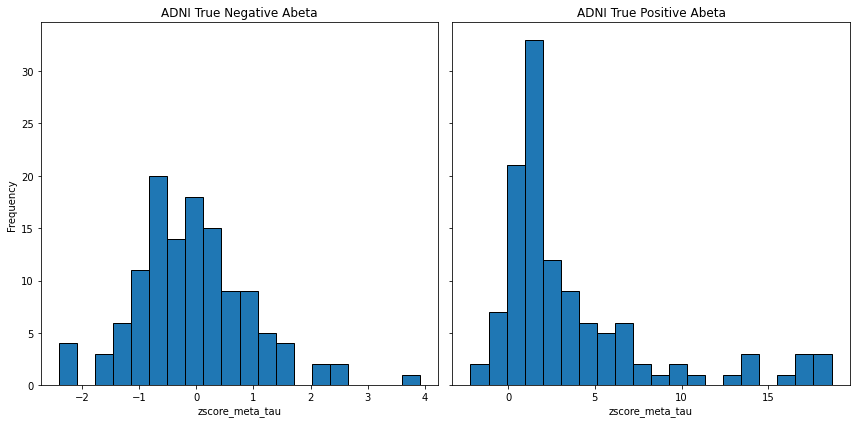

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[df_filtered['CENTILOIDS'] < 20]
positive_abeta = df_filtered[df_filtered['CENTILOIDS'] >= 20]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('ADNI True Negative Abeta')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')

# Plot for Positive Abeta
axs[1].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('ADNI True Positive Abeta')
axs[1].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()



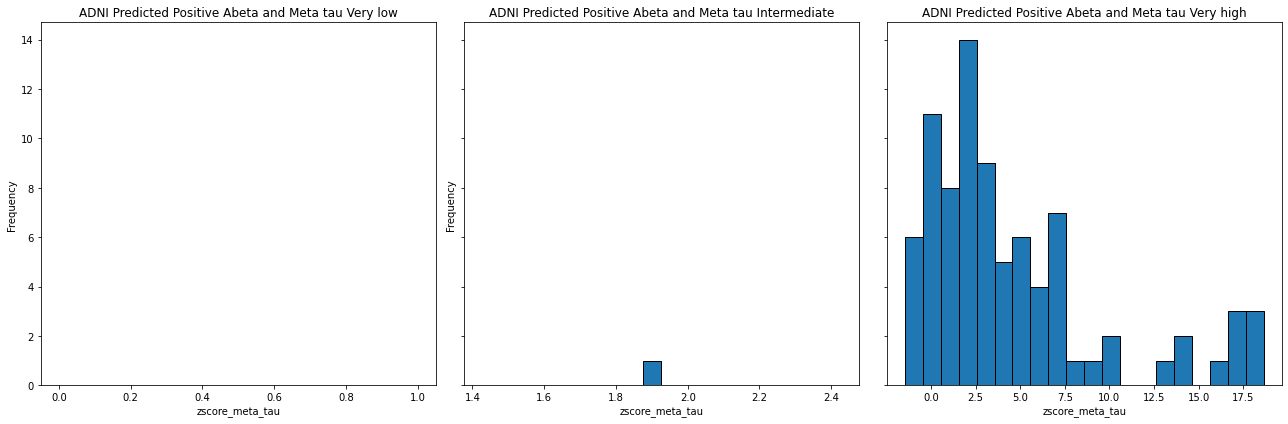

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('ADNI Predicted Positive Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('ADNI Predicted Positive Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('ADNI Predicted Positive Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()



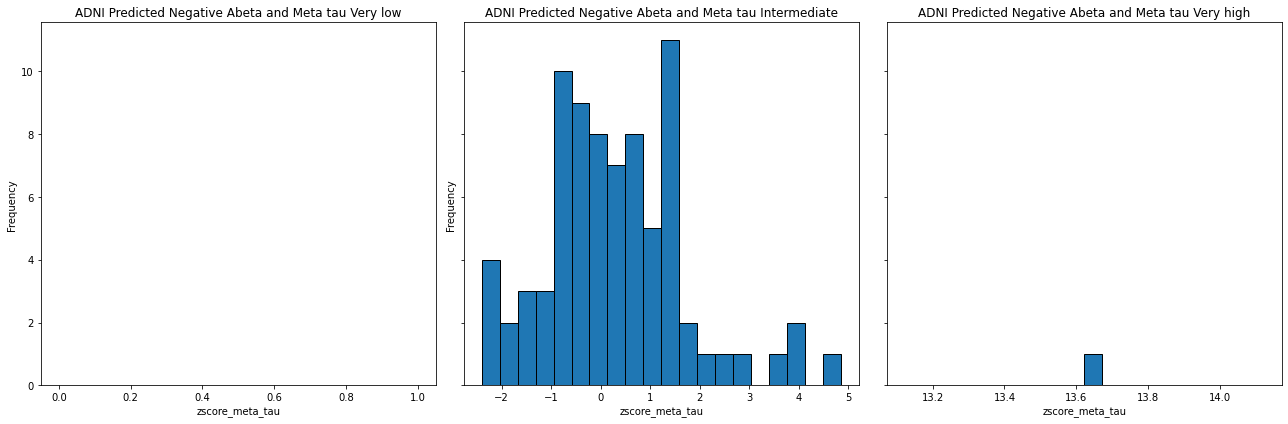

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('ADNI Predicted Negative Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('ADNI Predicted Negative Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('ADNI Predicted Negative Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()



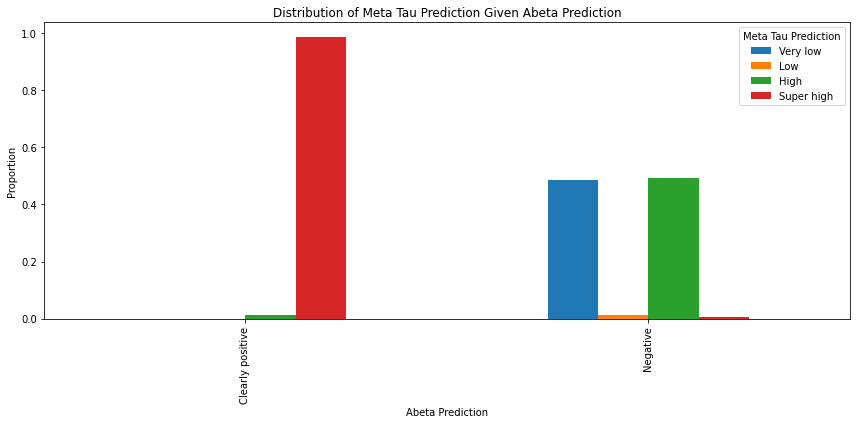

In [105]:
desired_order_meta_tau = ['Very low', 'Low', 'High', 'Super high']

# Group data by Abeta Prediction and Meta Tau Prediction counts
meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title('Distribution of Meta Tau Prediction Given Abeta Prediction')
plt.xlabel('Abeta Prediction')
plt.ylabel('Proportion')
plt.legend(title='Meta Tau Prediction')
plt.tight_layout()
plt.show()

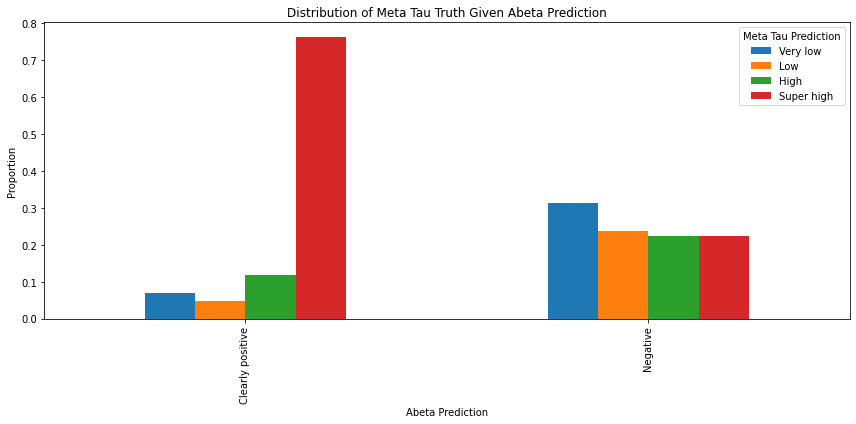

In [106]:
desired_order_meta_tau = ['Very low', 'Low', 'High', 'Super high']

# Group data by Abeta Prediction and Meta Tau Prediction counts
meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Truth'].value_counts(normalize=True).unstack().fillna(0)
meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title('Distribution of Meta Tau Truth Given Abeta Prediction')
plt.xlabel('Abeta Prediction')
plt.ylabel('Proportion')
plt.legend(title='Meta Tau Prediction')
plt.tight_layout()
plt.show()

## HABS-HD

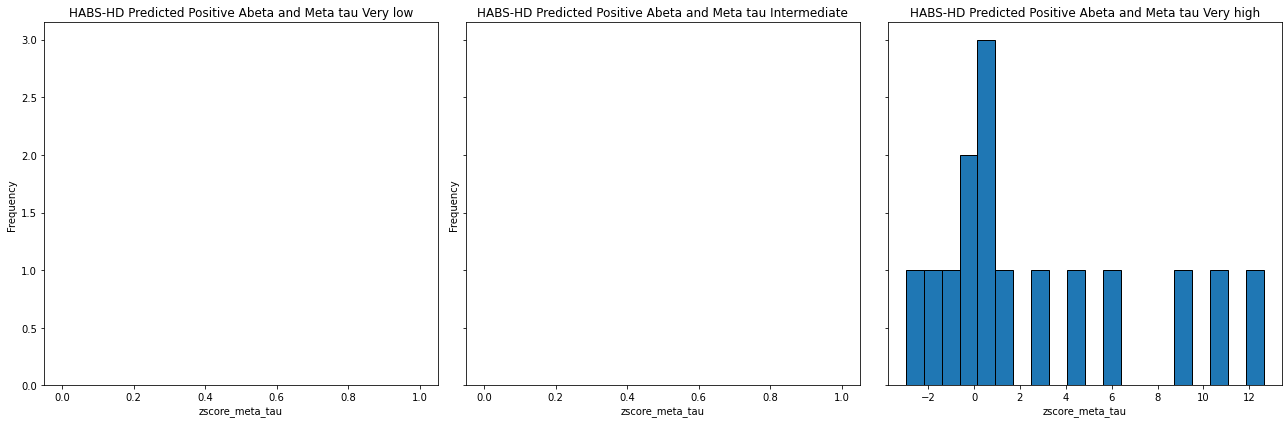

In [18]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
df=result_adni
# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)
abeta_value=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df_meta_tau=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df_meta_tau.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df_meta_tau['Prediction'] =df_meta_tau[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

df["Meta tau Prediction"]=df_meta_tau['Prediction']
df["Meta tau Truth"]=df_meta_tau['Truth']
df["CENTILOIDS"]=abeta_value["nearest_ab_centiloid"]
df["zscore_meta_tau"]=abeta_value["zscore_meta_tau"]
df=df.fillna("NA")
df_filtered=df[(df["Truth"]!="Unknown.")&(df["zscore_meta_tau"]!="NA")]
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('HABS-HD Predicted Positive Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('HABS-HD Predicted Positive Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('HABS-HD Predicted Positive Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# desired_order_meta_tau = ['Very low', 'High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Prediction Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()
# desired_order_meta_tau = ['Very low', 'Low', 'High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Truth'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Truth Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()



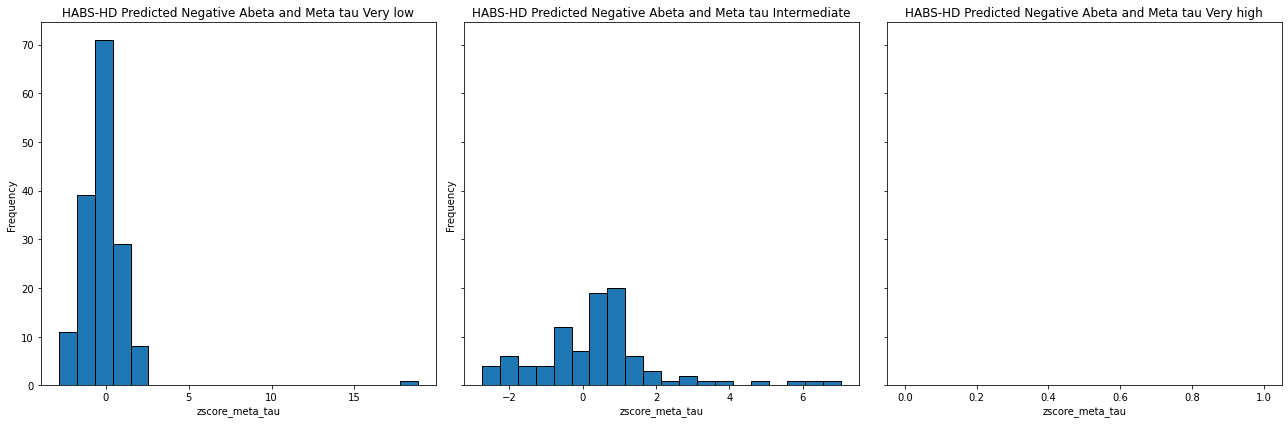

In [19]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
df=result_adni
# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)
abeta_value=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df_meta_tau=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df_meta_tau.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df_meta_tau['Prediction'] =df_meta_tau[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

df["Meta tau Prediction"]=df_meta_tau['Prediction']
df["Meta tau Truth"]=df_meta_tau['Truth']
df["CENTILOIDS"]=abeta_value["nearest_ab_centiloid"]
df["zscore_meta_tau"]=abeta_value["zscore_meta_tau"]
df=df.fillna("NA")
df_filtered=df[(df["Truth"]!="Unknown.")&(df["zscore_meta_tau"]!="NA")]
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('HABS-HD Predicted Negative Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('HABS-HD Predicted Negative Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('HABS-HD Predicted Negative Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# desired_order_meta_tau = ['Very low', 'High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Prediction Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()
# desired_order_meta_tau = ['Very low', 'Low', 'High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Truth'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Truth Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()



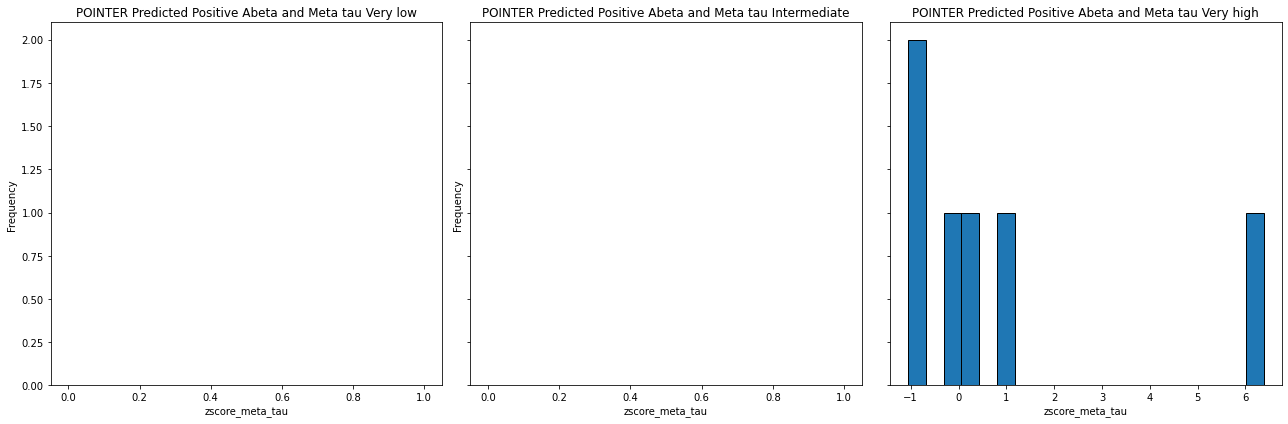

In [20]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\POINTER-results\\POINTER_probability_abeta.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
df=result_adni
# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)
abeta_value=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_testing.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\POINTER-results\\POINTER_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df_meta_tau=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df_meta_tau.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df_meta_tau['Prediction'] =df_meta_tau[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

df["Meta tau Prediction"]=df_meta_tau['Prediction']
df["Meta tau Truth"]=df_meta_tau['Truth']
df["CENTILOIDS"]=abeta_value["FBB_CENTILOIDS_1"]
df["zscore_meta_tau"]=abeta_value["zscore_meta_tau"]
df=df.fillna("NA")
df_filtered=df[(df["Truth"]!="Unknown.")&(df["zscore_meta_tau"]!="NA")]
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('POINTER Predicted Positive Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('POINTER Predicted Positive Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('POINTER Predicted Positive Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# desired_order_meta_tau = ['Very low', 'High', 'Super high']

# desired_order_meta_tau = ['Very low','High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Prediction Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()
# desired_order_meta_tau = ['Very low', 'Low', 'High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Truth'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Truth Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()



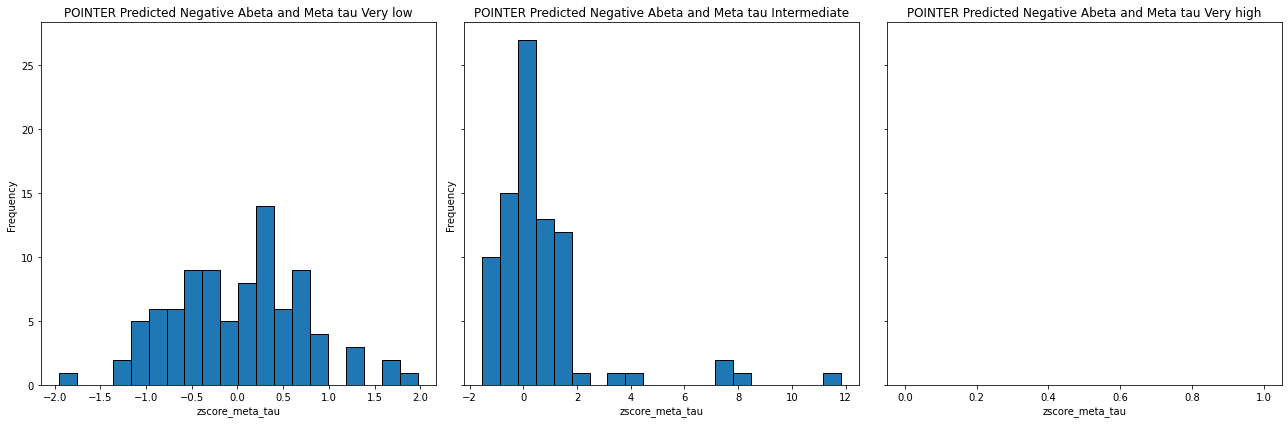

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Separate the data based on abeta status derived from the CENTILOIDS values
# Negative: centiloids < 20; Positive: centiloids >= 20
negative_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('POINTER Predicted Negative Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('POINTER Predicted Negative Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('POINTER Predicted Negative Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# desired_order_meta_tau = ['Very low', 'High', 'Super high']

# desired_order_meta_tau = ['Very low','High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]



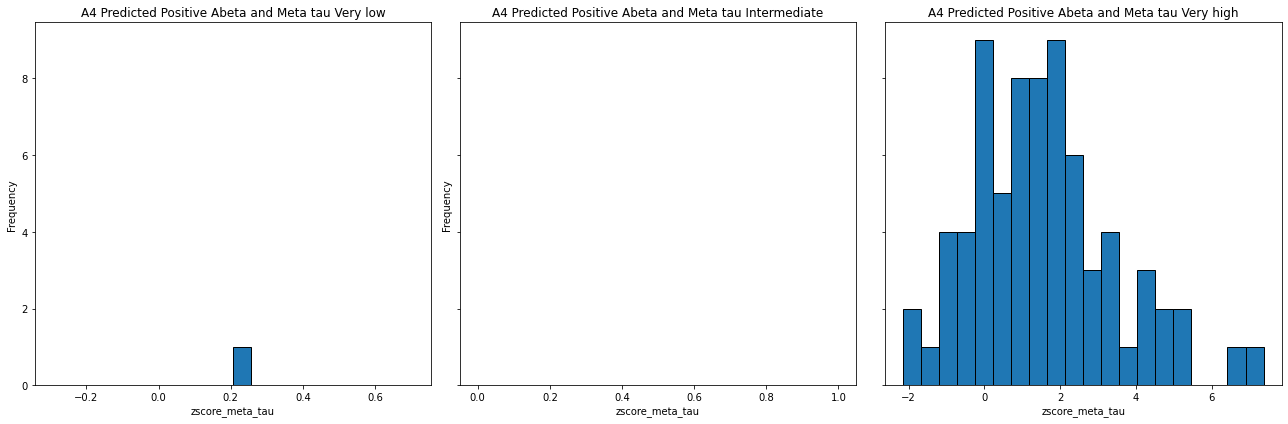

In [22]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4-results\\A4_probability_abeta.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
df=result_adni
# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)
abeta_value=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4_thickness_Dec_17_validation.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4-results\\A4_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df_meta_tau=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df_meta_tau.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df_meta_tau['Prediction'] =df_meta_tau[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

df["Meta tau Prediction"]=df_meta_tau['Prediction']
df["Meta tau Truth"]=df_meta_tau['Truth']
df["CENTILOIDS"]=abeta_value["centiloid"]
df["zscore_meta_tau"]=abeta_value["zscore_meta_tau"]
df=df.fillna("NA")
df_filtered=df[(df["Truth"]!="Unknown.")&(df["zscore_meta_tau"]!="NA")]
negative_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] !="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('A4 Predicted Positive Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('A4 Predicted Positive Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('A4 Predicted Positive Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# desired_order_meta_tau = ['Very low','High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Prediction Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()
# desired_order_meta_tau = ['Very low', 'Low', 'High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Truth'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

# # Create bar plots for Meta Tau Prediction distribution given Abeta Prediction
# meta_tau_distribution.plot(kind='bar', figsize=(12, 6), stacked=False)
# plt.title('Distribution of Meta Tau Truth Given Abeta Prediction')
# plt.xlabel('Abeta Prediction')
# plt.ylabel('Proportion')
# plt.legend(title='Meta Tau Prediction')
# plt.tight_layout()
# plt.show()



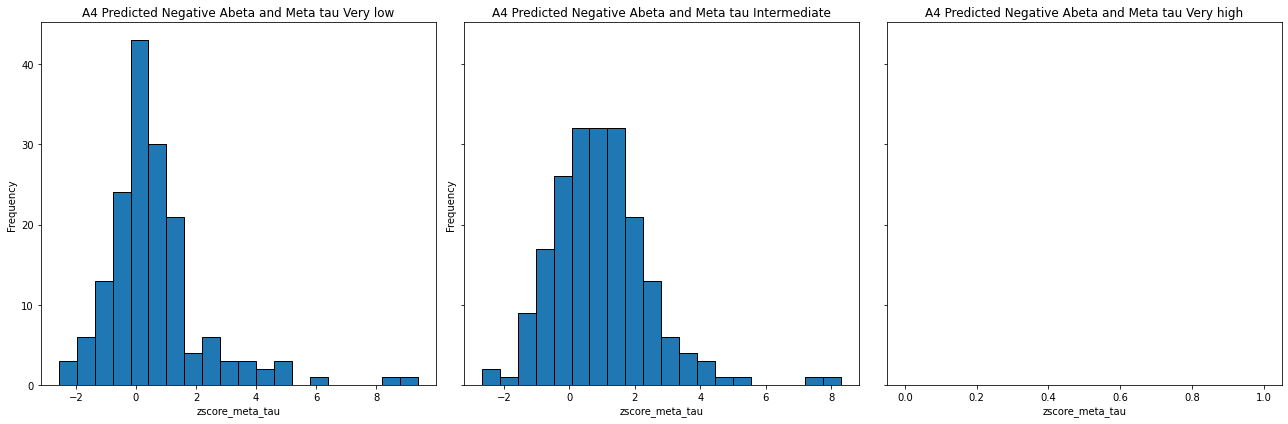

In [23]:
negative_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Low")|(df_filtered['Meta tau Prediction'] =="High") )]
positive_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Super high") )]
intermediate_abeta = df_filtered[(df_filtered['Prediction'] =="Negative") &( (df_filtered['Meta tau Prediction'] =="Very low") )]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Abeta
axs[0].hist(intermediate_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[0].set_title('A4 Predicted Negative Abeta and Meta tau Very low')
axs[0].set_xlabel('zscore_meta_tau')
axs[0].set_ylabel('Frequency')
# Plot for Negative Abeta
axs[1].hist(negative_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[1].set_title('A4 Predicted Negative Abeta and Meta tau Intermediate')
axs[1].set_xlabel('zscore_meta_tau')
axs[1].set_ylabel('Frequency')
# Plot for Positive Abeta
axs[2].hist(positive_abeta['zscore_meta_tau'], bins=20, edgecolor='black')
axs[2].set_title('A4 Predicted Negative Abeta and Meta tau Very high')
axs[2].set_xlabel('zscore_meta_tau')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# desired_order_meta_tau = ['Very low','High', 'Super high']

# # Group data by Abeta Prediction and Meta Tau Prediction counts
# meta_tau_distribution = df_filtered.groupby('Prediction')['Meta tau Prediction'].value_counts(normalize=True).unstack().fillna(0)
# meta_tau_distribution = meta_tau_distribution[desired_order_meta_tau]

